<a href="https://colab.research.google.com/github/kajalpatel2005/Spotify-Data-Analysis/blob/main/SpotifyDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as numpy
import seaborn as sns
from collections import Counter
from google.colab import drive
drive.mount('/content/gdrive')
import matplotlib
import matplotlib.pyplot as plt
!pip install spotipy

Mounted at /content/gdrive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.8/251.8 kB 8.4 MB/s eta 0:00:00


In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [ ]:
df1 = pd.read_json("/content/gdrive/MyDrive/StreamingHistory_music_0.json")
df2 = pd.read_json("/content/gdrive/MyDrive/StreamingHistory_music_1.json")

df = pd.concat([df1,df2], ignore_index=True)

df.head(5)

,endTime,artistName,trackName,msPlayed
0,2023-02-13 03:32,Anuradha Sriram,Ishq Bina,385111
1,2023-02-13 03:34,Tory Lanez,‘87 Stingray,141333
2,2023-02-13 03:35,Giveon,All To Me,0
3,2023-02-13 03:35,Majid Jordan,Stars Align (with Drake),440
4,2023-02-13 03:35,Chris Brown,Under The Influence,540


In [ ]:
print(df.columns)

Index(['endTime', 'artistName', 'trackName', 'msPlayed'], dtype='object')


In [ ]:
artistNames = set(df['artistName'])

In [ ]:
artistNames

{'*NSYNC',
 '11:11 Music Group',
 '21 Savage',
 '24kGoldn',
 '2Pac',
 '5 Seconds of Summer',
 '50 Cent',
 '6LACK',
 '6ix9ine',
 '88rising',
 'A Boogie Wit da Hoodie',
 'A$AP Ferg',
 'A$AP Rocky',
 'A.R. Rahman',
 'ADTurnUp',
 'AP Dhillon',
 'ASTN',
 'Aadesh Shrivastava',
 'Aaliyah',
 'Aaman Trikha',
 'Aamir Khan',
 'Aaron May',
 'Aastha Gill',
 'Ab-Soul',
 'Abdul Hannan',
 'Abhay Jodhpurkar',
 'Abhijeet Srivastava',
 'Adele',
 'Aditi Paul',
 'Aditya Narayan',
 'Aditya Rikhari',
 'Adnan Sami',
 'Adrian',
 'Adrien de la Salle',
 'Aerosmith',
 'Aidan Bissett',
 'Aishwarya Majmudar',
 'Ajay-Atul',
 'Akhil',
 'Akhil Sachdeva',
 'Akon',
 'Akriti Kakar',
 'Alexandra Stan',
 'Alicia Keys',
 'Alina Baraz',
 'Alka Yagnik',
 'Alvaro Soler',
 'Amaal Mallik',
 'Amaarae',
 'Ami Mishra',
 'Aminé',
 'Amit Trivedi',
 'Amrita Singh',
 'Amschel',
 'Andra & The Backbone',
 'Andrea Vanzo',
 'Anirudh Ravichander',
 'Anitta',
 'Ankit Tiwari',
 'Anne-Marie',
 'Antonio Vivaldi',
 'Antonín Dvořák',
 'Anupam Amo

In [ ]:
len(artistNames)

888

In [ ]:
artistGenreMap = {key: None for key in artistNames}

In [ ]:
client_id = '656cd7607ce442fba32344692f33f159'
client_secret = '3e79f31a69334840a21bfb479b52fd04'
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) #spotify object to access API

In [ ]:
import time

In [ ]:
for artist in artistGenreMap:
    artistGenreMap[artist] = sp.search(q=artist, type='artist')

In [ ]:
updatedArtistToGenreMap = {}
for artist in artistGenreMap:
    try:
        updatedArtistToGenreMap[artist] =  artistGenreMap[artist]['artists']['items'][0]['genres']
    except:
        updatedArtistToGenreMap[artist] = None

In [ ]:
df['artist_genres'] = df['artistName'].map(updatedArtistToGenreMap)

In [ ]:
df.to_csv('demoDataWithGenres.csv')

In [ ]:
preListOfGenres = df['artist_genres'].tolist()

In [ ]:
listOfGenres = []

In [ ]:
for aL in preListOfGenres:
    if aL is not None:
        listOfGenres.extend(aL)

In [ ]:
from wordcloud import WordCloud
import collections

In [ ]:
counter = collections.Counter(listOfGenres)
genreFrequencies = dict(counter)

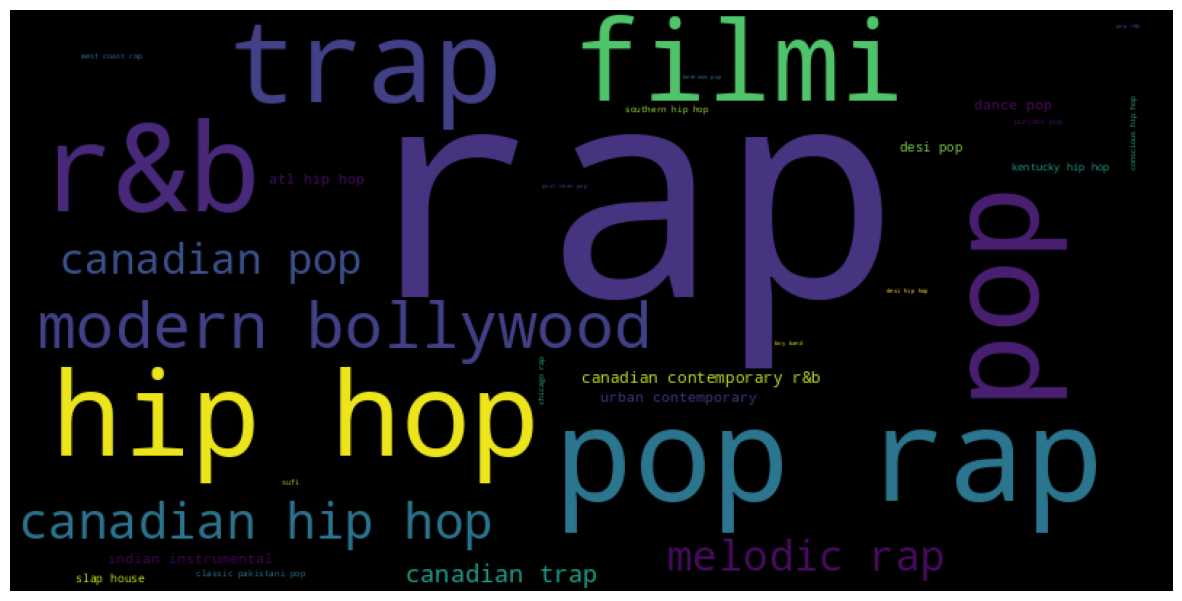

In [ ]:
def plot_cloud(wordcloud):
    fig = matplotlib.pyplot.figure(figsize=(15,8))
    matplotlib.pyplot.imshow(wordcloud)
    matplotlib.pyplot.axis("off");
wordcloud = WordCloud(width=800,height=400, max_words=100,relative_scaling=1,normalize_plurals=False,
                      collocations=False).generate_from_frequencies(genreFrequencies)
plot_cloud(wordcloud)

In [ ]:
df['endTime'] = pd.to_datetime(df['endTime'])

# Change the format of the timestamps
df['endTime'] = df['endTime'].dt.strftime('%Y-%m-%d %H:%M')

df["Play-Time"]= pd.to_datetime(df["endTime"]) # To create a additional column
df['year'] = pd.DatetimeIndex(df["Play-Time"]).year
df['month'] = pd.DatetimeIndex(df["Play-Time"]).month
df['day'] = pd.DatetimeIndex(df["Play-Time"]).day
df['weekday'] = pd.DatetimeIndex(df["Play-Time"]).weekday
df['time'] = pd.DatetimeIndex(df["Play-Time"]).time
df['hours'] = pd.DatetimeIndex(df["Play-Time"]).hour
df['day-name'] = df["Play-Time"].apply(lambda x: x.day_name())
df['Count'] = 1

df["Time-Played (hh-mm-ss)"] = pd.to_timedelta(df["msPlayed"], unit='ms')
def hours(td):
    # To get the hour information
    return td.seconds/3600

def minutes(td):
    # To get the minutes information
    return (td.seconds/60)%60

df["Listening Time(Hours)"] = df["Time-Played (hh-mm-ss)"].apply(hours).round(3)
df["Listening Time(Minutes)"] = df["Time-Played (hh-mm-ss)"].apply(minutes).round(3)

In [ ]:
fav_songs = df.groupby(["trackName"])["Count"].count()


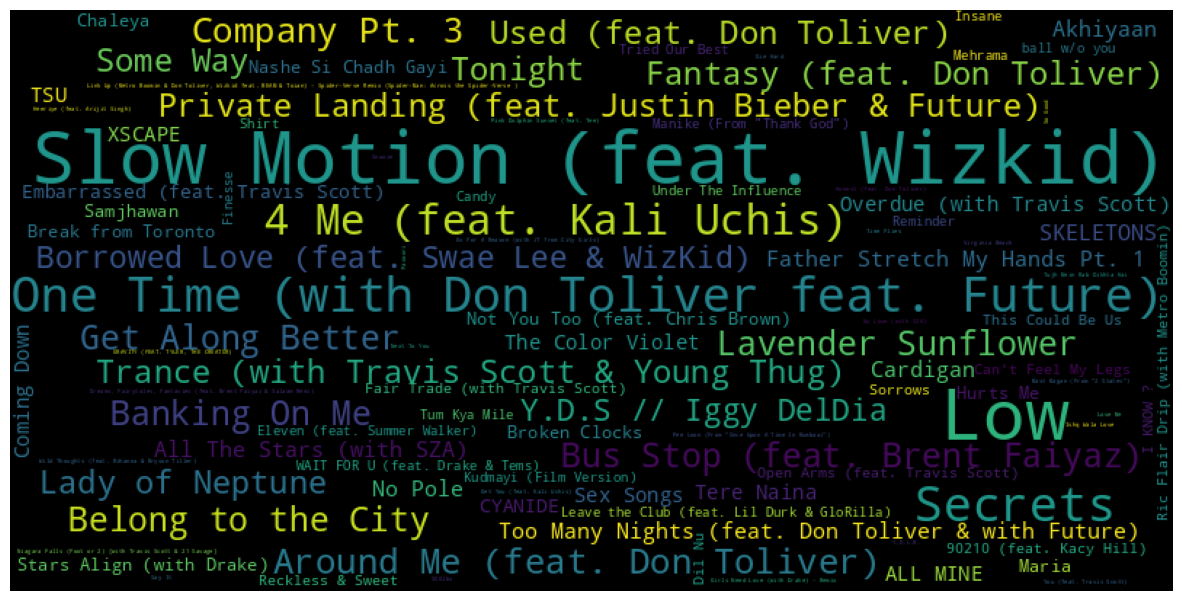

In [ ]:

def plot_cloud(wordcloud):
    fig = matplotlib.pyplot.figure(figsize=(15,8))
    matplotlib.pyplot.imshow(wordcloud)
    matplotlib.pyplot.axis("off");
wordcloud = WordCloud(width=800,height=400, max_words=100,relative_scaling=1,normalize_plurals=False,
                      collocations=False).generate_from_frequencies(fav_songs)
plot_cloud(wordcloud)

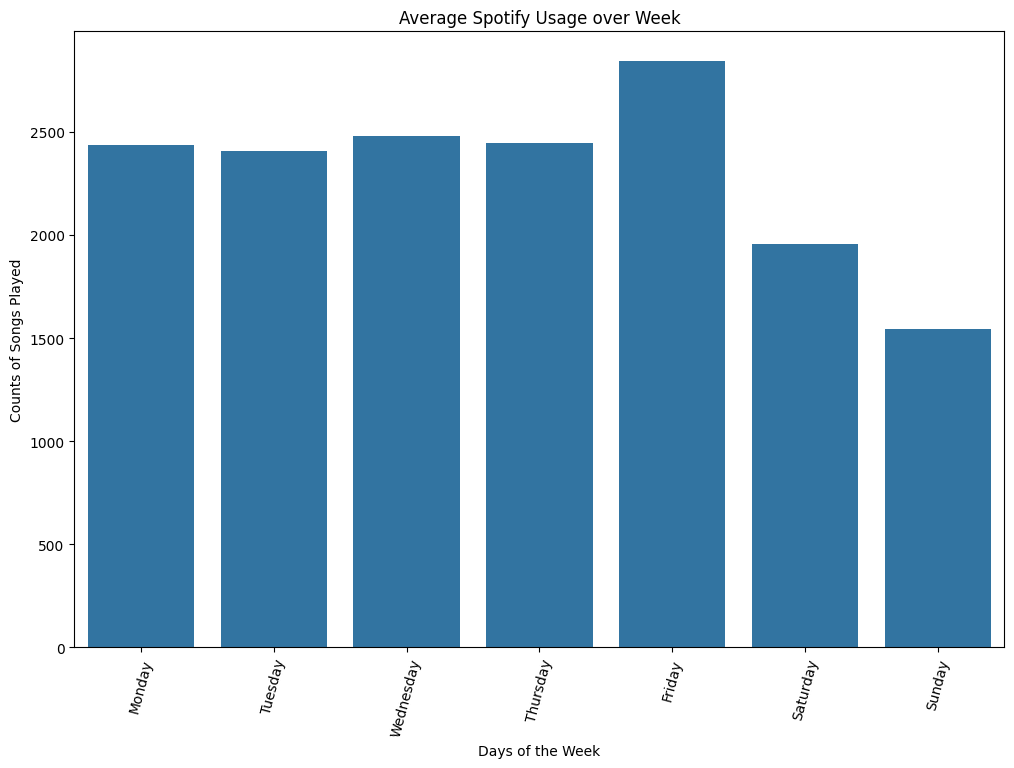

In [ ]:
fig, ax = matplotlib.pyplot.subplots(figsize=(12,8))
ax = sns.countplot(x=df["day-name"],ax=ax)
matplotlib.pyplot.xticks(rotation=75);
ax.set(title="Average Spotify Usage over Week",xlabel="Days of the Week",ylabel="Counts of Songs Played");

Save as CSV

In [ ]:
df.to_csv('spotifyApi.Data.csv', index = True, header = True)